In [19]:
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_vis
from pm4py.visualization.process_tree import visualizer as pt_vis
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as pt_converter



In [3]:
# Create synthetic event log L1
data = []

# Trace 1: <a,b,c,e> x10
for i in range(10):
    trace_id = f"trace_abc_{i}"
    for idx, act in enumerate(["a", "b", "c", "e"]):
        data.append({"case_id": trace_id, "activity": act, "timestamp": pd.Timestamp("2025-01-01") + pd.Timedelta(seconds=idx)})

# Trace 2: <a,c,b,e> x5
for i in range(5):
    trace_id = f"trace_acb_{i}"
    for idx, act in enumerate(["a", "c", "b", "e"]):
        data.append({"case_id": trace_id, "activity": act, "timestamp": pd.Timestamp("2025-01-02") + pd.Timedelta(seconds=idx)})

# Trace 3: <a,d,e>
trace_id = "trace_ade"
for idx, act in enumerate(["a", "d", "e"]):
    data.append({"case_id": trace_id, "activity": act, "timestamp": pd.Timestamp("2025-01-03") + pd.Timedelta(seconds=idx)})

# Convert to DataFrame
df = pd.DataFrame(data)
df = dataframe_utils.convert_timestamp_columns_in_df(df)




In [ ]:
# Convert to PM4Py Event Log
# Assuming 'df' is your original DataFrame with columns: 'case_id', 'activity', 'timestamp'
df.rename(columns={
    'case_id': 'case:concept:name',
    'activity': 'concept:name',
    'timestamp': 'time:timestamp'
}, inplace=True)

# Ensure the timestamp column is in datetime format
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

# Convert the DataFrame to an event log
event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)
# event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG, parameters={"case_id_key": "case_id"})

process_tree = inductive_miner.apply(event_log)

# Apply Inductive Miner to obtain the Petri net
net, initial_marking, final_marking = pt_converter.apply(process_tree)



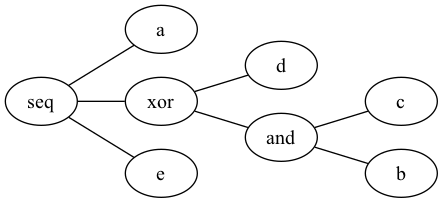

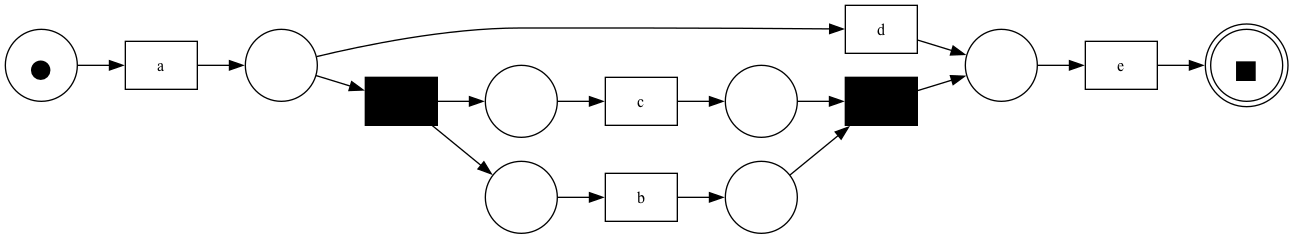

In [18]:

# Visualize Process Tree
pt_gviz = pt_vis.apply(process_tree)
pt_vis.view(pt_gviz)

# Visualize Petri Net
pn_gviz = pn_vis.apply(net, initial_marking, final_marking)
pn_vis.view(pn_gviz)

In [5]:
log_converter

<module 'pm4py.objects.conversion.log.converter' from '/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pm4py/objects/conversion/log/converter.py'>

In [20]:
process_tree

->( 'a', X( 'd', +( 'c', 'b' ) ), 'e' )

In [ ]:


# Apply Inductive Miner to obtain the process tree
process_tree = inductive_miner.apply(event_log)

# Convert the process tree to a Petri net
net, initial_marking, final_marking = pt_converter.apply(process_tree)


In [ ]:
# function to visualize the Petri net


